In [2]:
from google.colab import files
uploaded = files.upload()

Saving sales_data.csv to sales_data.csv


In [3]:
import sqlite3
import pandas as pd

# Create a database in RAM
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Load CSV into Pandas
df = pd.read_csv("sales_data.csv")

# Load Data into SQL
df.to_sql("sales", conn, if_exists="replace", index=False)

# Total Revenue
query = "SELECT SUM(Revenue) AS Total_Revenue FROM sales;"
df_query = pd.read_sql(query, conn)
print(df_query)

# Top Selling Products
query = "SELECT Product, SUM(Revenue) AS Total_Revenue FROM sales GROUP BY Product ORDER BY Total_Revenue DESC;"
df_query = pd.read_sql(query, conn)
print(df_query)

   Total_Revenue
0          26200
  Product  Total_Revenue
0  Laptop          13000
1   Phone          11200
2  Tablet           2000


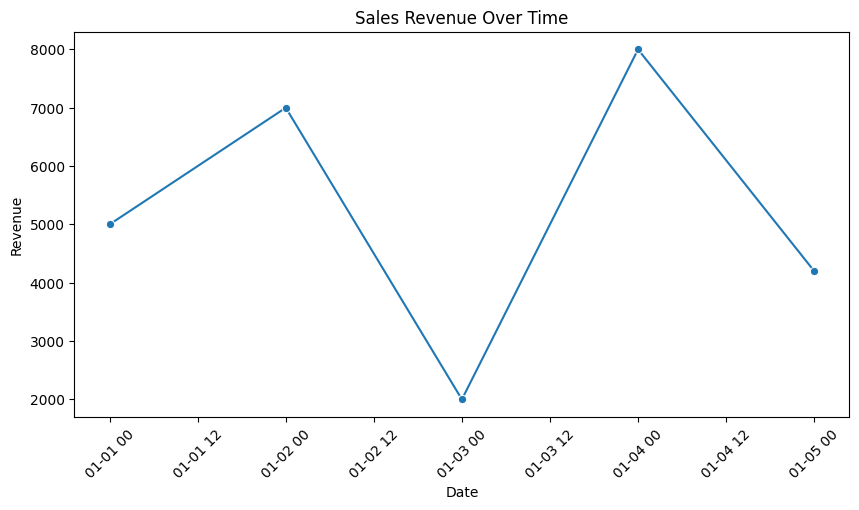

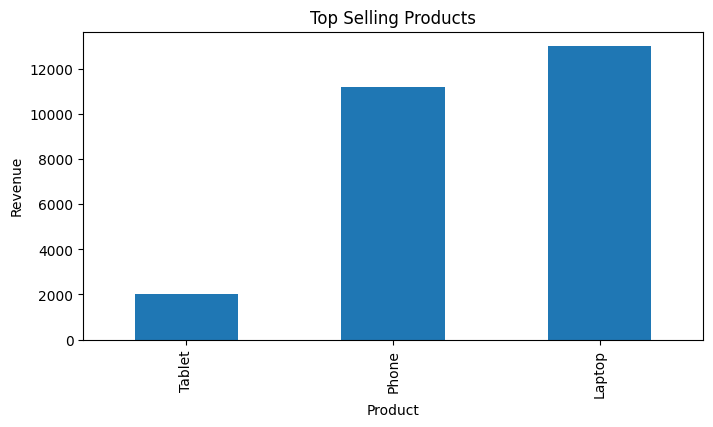

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales Trend Over Time
df["Date"] = pd.to_datetime(df["Date"])
df_grouped = df.groupby("Date")["Revenue"].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=df_grouped.index, y=df_grouped.values, marker="o")
plt.title("Sales Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

# Top Selling Products
top_products = df.groupby("Product")["Revenue"].sum().sort_values()
top_products.plot(kind="bar", figsize=(8, 4))
plt.title("Top Selling Products")
plt.ylabel("Revenue")
plt.show()

In [5]:
df_query.to_csv("query_results.csv", index=False)